### Author: Babaniyi Olaniyi

##### This study is outlined below:
1. Exploratory Data Analysis
2. Compare the perfomance of different models for predicting credit fraud
3. Summary

In [1]:
#______________________________Importing required libraries_________________
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from datetime import datetime

#_______________________________Importing Dataset___________________________
df = pd.read_csv('credit.csv')

#_______________________________Looking at data types of the dataset___________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# 1. EXPLORATORY DATA ANALYSIS

#### 1. How many fraudulent and non-fraudulent transactions do we have?
There are 8213 fraudulent transactions accounting for 0.12% of total transactions. This tells us we have a highly imbalanced dataset and we should take that into account when creating a predictive model.

In [2]:
#_______________________________Number of fraudulent and non-fraudulent transactions___________________________
print("Number of fraudulent and non-fraudulent transactions")
df['isFraud'].value_counts()

Number of fraudulent and non-fraudulent transactions


0    6354407
1       8213
Name: isFraud, dtype: int64

In [3]:
#_______________________________Number of fraudulent and non-fraudulent transactions___________________________
#df[['type', 'isFraud', 'isFlaggedFraud']] = df[['type', 'isFraud', 'isFlaggedFraud']].astype('category')
                                               
print("Percentages of fraudulent and non-fraudulent transactions")
df['isFraud'].value_counts() / len(df['isFraud'])

Percentages of fraudulent and non-fraudulent transactions


0    0.998709
1    0.001291
Name: isFraud, dtype: float64

#### 2. How many transactionas are flagged fraudulent?
Only 16 transactions are flagged as being fraudulent! wow! we have a great work to do!

In [4]:
print("Number of transactions flagged as fraudulent")
df['isFlaggedFraud'].value_counts()

Number of transactions flagged as fraudulent


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

#### 3. How many fraudulent transactions are correctly/incorrectly flagged as fraudulent?
- There are 8213 fraudulent transactions
- Only 16 were  correctly flagged as being fraudulent
- 8197 were incorrectly flagged as non-fraudulent

In [5]:
pd.crosstab(df.isFraud, df.isFlaggedFraud , margins = True)

isFlaggedFraud,0,1,All
isFraud,,,
0,6354407,0,6354407
1,8197,16,8213
All,6362604,16,6362620


#### 4. Feature Engineering
- Create a new feauture called **diff_orig** which is the difference between the old balance of the user and the new balance after a transaction.

- Create a new feauture called **diff_dest** which is the difference between the old balance of the recipient and the new balance of the recipient after a transaction.

- diff_orig_dest
- diff_new_dest

In [6]:
#________Feature Engineering__________
df['diff_orig'] = np.abs(df['oldbalanceOrg'] - df['newbalanceOrig'])
df['diff_dest'] = np.abs(df['oldbalanceDest'] - df['newbalanceDest'])
df['diff_orig_dest'] = np.abs(df['oldbalanceOrg'] - df['oldbalanceDest'])
df['diff_new_dest'] = np.abs(df['newbalanceOrig'] - df['newbalanceDest'])

df[['diff_orig', 'diff_dest', 'diff_orig_dest','diff_new_dest' ]].describe()

,diff_orig,diff_dest,diff_orig_dest,diff_new_dest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,5.306600e+04,1.858962e+05,1.563497e+06,1.735203e+06
std,1.383437e+05,8.011003e+05,4.027698e+06,4.275070e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.016600e+04,3.048017e+04
50%,7.273940e+03,6.270585e+04,2.145337e+05,3.411073e+05
75%,5.171300e+04,2.046755e+05,1.311500e+06,1.583891e+06
max,1.000000e+07,1.056878e+08,3.560159e+08,3.561793e+08


#### 5. Visualization of the type of transaction

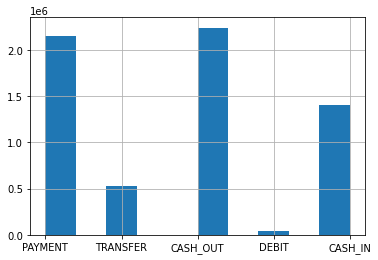

In [7]:
df['type'] = df['type'].astype('category')
df['type'].hist()

#### 6. Correlation Matrix
The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation, when it's close to -2, it means there is a strong negative correlation, when close to 0 there's no linear correlation.

- Note that the correlation coefficient only measures linear correlations ("if x goes up, then y generally goes u/down").
- It may completely miss out nonlinear relationships (e.g. "if x close to 0, then y generally goes up").
- I will drop variables such as step, oldbalanceOrg,  newbalanceOrig, oldBalanceDest, newbalanceDest as they don't have any relationship with fraud and the newly created variables are better.

In [8]:
corr_matrix = np.round(df.corr(), 3)
corr_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diff_orig,diff_dest,diff_orig_dest,diff_new_dest
step,1.000,0.022,-0.010,-0.010,0.028,0.026,0.032,0.003,0.012,0.000,0.015,0.015
amount,0.022,1.000,-0.003,-0.008,0.294,0.459,0.077,0.012,0.183,0.868,0.244,0.389
oldbalanceOrg,-0.010,-0.003,1.000,0.999,0.066,0.042,0.010,0.004,0.245,-0.002,0.578,0.550
newbalanceOrig,-0.010,-0.008,0.999,1.000,0.068,0.042,-0.008,0.004,0.233,-0.005,0.577,0.548
oldbalanceDest,0.028,0.294,0.066,0.068,1.000,0.977,-0.006,-0.001,0.050,0.259,0.793,0.790
newbalanceDest,0.026,0.459,0.042,0.042,0.977,1.000,0.001,-0.001,0.040,0.456,0.769,0.805
isFraud,0.032,0.077,0.010,-0.008,-0.006,0.001,1.000,0.044,0.365,0.025,0.003,-0.002
isFlaggedFraud,0.003,0.012,0.004,0.004,-0.001,-0.001,0.044,1.000,-0.001,-0.000,0.002,0.002
diff_orig,0.012,0.183,0.245,0.233,0.050,0.040,0.365,-0.001,1.000,0.078,0.130,0.120
diff_dest,0.000,0.868,-0.002,-0.005,0.259,0.456,0.025,-0.000,0.078,1.000,0.213,0.385


In [9]:
df = df.drop(['step','nameOrig', 'nameDest','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis = 1)

# 2. MODELLING

#### Splitting data into train and test sets using stratified sampling

In [10]:
#___________ Split Data_________
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

for train_index, test_index in split.split(df, df['isFraud']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
print("Checking the proportion of Fraud to know if it corresponds to the actual data")   
strat_test_set['isFraud'].value_counts()/len(strat_test_set)

Checking the proportion of Fraud to know if it corresponds to the actual data


0    0.998709
1    0.001291
Name: isFraud, dtype: float64

#### Scaling

In [12]:
del train_index, test_index, df

#___________Scaling___________

"""_________Train Data_________"""
df_train = strat_train_set.copy()
df_train = pd.get_dummies(df_train)

df_train_labels = strat_train_set[['isFraud']]
df_train = df_train.drop('isFraud', axis = 1)

from sklearn.preprocessing import MinMaxScaler

df_train[['amount', 'diff_orig', 'diff_dest']] = MinMaxScaler().fit_transform(df_train[[ 'amount', 'diff_orig', 'diff_dest']])



In [13]:
"""___________Test Data____________"""
df_test = strat_test_set.copy()
df_test = pd.get_dummies(df_test)

df_test_labels = strat_test_set[['isFraud']]
df_test = df_test.drop('isFraud', axis = 1)

df_test[['amount', 'diff_orig', 'diff_dest', 'diff_orig_dest', 'diff_new_dest']] = MinMaxScaler().fit_transform(df_test[['amount', 'diff_orig', 'diff_dest', 'diff_orig_dest', 'diff_new_dest']])


### ML Techniques for Handling Highly Imbalanced Dataset
- **Oversampling:** Oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model.
- **Undersampling:** Undersampling the majority class.
- **SMOTE:** SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
- **Ensemble Methods:** Random Forest, XGBoost, etc
- **Combined Class Methods:** SMOTE  + Ensemble methods

**References**

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://machinelearningmastery.com/what-is-imbalanced-classification/
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/


#### 1. EXTREME GRADIENT BOOSTING 
1. If you care only about the overall performance metric (AUC) of your prediction:
    - Balance the positive and negative weights via scale_pos_weight
    - Use AUC for evaluation

scale_pos_weight = count(non-fraudulent transactions)/count(fraudulent transactions)

In practice, that works pretty well, but since the dataset is extremely unbalanced I used something more conservative like:

scale_pos_weight = sqrt(count(non-fraudulent transactions)/count(fraudulent transactions)) 

2. If you care about predicting the right probability:
    - In such a case, you cannot re-balance the dataset
    - Set parameter max_delta_step to a finite number (say 1) to help convergence


**Control Overfitting**

When you observe high training accuracy, but low test accuracy, it is likely that you encountered overfitting problem.

There are in general two ways that you can control overfitting in XGBoost:

1. The first way is to directly control model complexity.

    - This includes max_depth, min_child_weight and gamma.

2. The second way is to add randomness to make training robust to noise.

    - This includes subsample and colsample_bytree.

    - You can also reduce stepsize eta. Remember to increase num_round when you do so.
    
https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [14]:

#____________ Hyperparameter Tuning___________
#param = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
# "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
# "min_child_weight" : [ 1, 3, 5, 7 ],
# "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
# "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


# To control overfitting, the parameters above should be used but i can't because of the large training time and 
# memory of my computer.



In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param = {
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3],
 "gamma"            : [ 0.0, 0.1],
    }

In [16]:
weight = np.round(np.sqrt((df_train_labels['isFraud']==0).sum() / (df_train_labels['isFraud']==1).sum()),0)

In [17]:
xcgrid = GridSearchCV(xgb.XGBClassifier(seed = 42, scale_pos_weight = weight, tree_method='hist', max_delta_step=1), 
                param, cv=2, 
                verbose=1, n_jobs=-1)

In [18]:
#________Fit the XGB to the Training Data

xcgrid.fit(df_train, df_train_labels.values)


Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  6.5min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=1,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=28.0, seed=42,
                                     subsample=None, tree_method

In [19]:
xc_model = xcgrid.best_estimator_
xc_pred_test = xc_model.predict(df_test)
xc_pred_train = xc_model.predict(df_train)

In [20]:
xc_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=1, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=28.0, seed=42,
              subsample=1, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [23]:
#_____________Performance of the model on train data_______
from sklearn.metrics import classification_report
print(classification_report(df_train_labels, xc_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       0.56      0.79      0.66      6570

    accuracy                           1.00   5090096
   macro avg       0.78      0.89      0.83   5090096
weighted avg       1.00      1.00      1.00   5090096



In [24]:
#_____________Performance of the model on test data_______
from sklearn.metrics import classification_report
print(classification_report(df_test_labels, xc_pred_test))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.73      0.05      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.85      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524



[[1225669   45212]
 [    437    1206]]


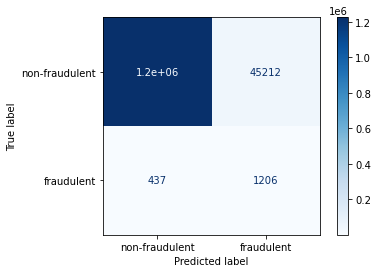

In [25]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(xc_model, df_test, df_test_labels,
                                 display_labels=['non-fraudulent', 'fraudulent'],
                                 cmap=plt.cm.Blues,
                                 )
print(disp.confusion_matrix)

plt.show()

In [26]:
#_____________Save the model___________
import joblib
joblib.dump(xc_model, 'tuned_xgb.pkl')

**Performance of the model**

The performance on the test set is not good enough as we have a large number of false positives. This causes the model to misclasify 45212 non-fraudulent transactions as fraudulent. The bank will have to deal with a lot of customer complaints as customers will be agitated as their transactions will be tagged as fraudulent.

#### 2. SMOTE + RANDOM UNDERSAMPLING OF MAJORITY CLASS + XGBOOST

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling Technique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [28]:
#____SMOTE + RANDOM UNDERSAMPLING OF MAJORITY CLASS
model = xgb.XGBClassifier(seed = 42, gamma=0.0, learning_rate=0.3, max_delta_step=1, max_depth=3,
              min_child_weight=1, scale_pos_weight=weight, tree_method='hist')
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [29]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scores = cross_val_score(pipeline, df_train, df_train_labels, scoring='roc_auc', cv=cv, n_jobs=-1)


In [30]:
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.995


In [31]:
smote_random = pipeline.fit(df_train, df_train_labels)
smote_rand_pred = smote_random.predict(df_test)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [32]:
print(classification_report(df_test_labels, smote_rand_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.89      0.05      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.92      0.51   1272524
weighted avg       1.00      0.96      0.98   1272524



[[1214344   56537]
 [    187    1456]]


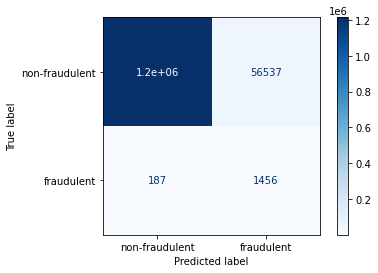

In [33]:
disp2 = plot_confusion_matrix(smote_random, df_test, df_test_labels,
                                 display_labels=['non-fraudulent', 'fraudulent'],
                                 cmap=plt.cm.Blues,
                                 )
print(disp2.confusion_matrix)

plt.show()

In [34]:
#___________Save the Model_______
joblib.dump(smote_random, 'smote_random.pkl')

**Peformance of this model**

This model reduces the number of false positives (56537) compared to the previous model (45212), however it correctly classifies more fraudulent transactions (1456) than the previous model (1206).

### 3. SMOTE oversampling with different k values for the KNN

Another area to explore would be to test different values of the k-nearest neighbors selected  in the SMOTE procedure when each new synthetic example is created. The default is k=5, although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

For example, we could grid search a range of values of k, such as values from 1 to 7, and  evaluate the pipeline for each value.

Running the example will perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by random undersampling and fitting a decision tree on the resulting  training dataset.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [35]:
k_values = [1, 2, 3]
for k in k_values:
	# define pipeline
	model = xgb.XGBClassifier(seed = 42, gamma=0.0, learning_rate=0.3, max_delta_step=1, max_depth=3,
              min_child_weight=1, scale_pos_weight=weight, tree_method='hist')
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
	scores = cross_val_score(pipeline, df_train, df_train_labels, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.995
> k=2, Mean ROC AUC: 0.995
> k=3, Mean ROC AUC: 0.995


It's evident there's no improvement in performance for different k neighbor values. To this effect, I will use k = 1.

In [36]:
model = xgb.XGBClassifier(seed = 42, gamma=0.0, learning_rate=0.3, max_delta_step=1, max_depth=3,
              min_child_weight=1, scale_pos_weight=weight, tree_method='hist')
over = SMOTE(sampling_strategy=0.1, k_neighbors=1)
under = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline(steps=steps)

In [37]:
smote_knn = pipeline.fit(df_train, df_train_labels)
smote_knn_pred = smote_random.predict(df_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
print(classification_report(df_test_labels, smote_knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.89      0.05      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.92      0.51   1272524
weighted avg       1.00      0.96      0.98   1272524



[[1189299   81582]
 [     92    1551]]


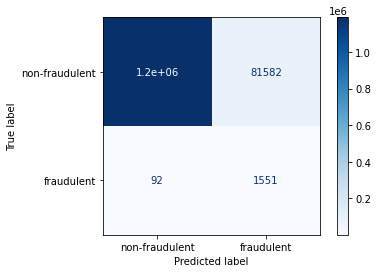

In [40]:
disp3 = plot_confusion_matrix(smote_knn, df_test, df_test_labels,
                                 display_labels=['non-fraudulent', 'fraudulent'],
                                 cmap=plt.cm.Blues,
                                 )
print(disp3.confusion_matrix)

plt.show()

In [41]:
#_____________ Save the Model
joblib.dump(smote_knn, 'smote_knn.pkl')

#### Performance of this model

On one hand, this model correctly classifies more fraudulent transactions (1551) than the other 2 models. On the other hand, it has the highest false positives (81582).

# 3. SUMMARY
A model is a simplified version of the observations. The simplifications are meant to discard the superfluous details that are unlikely to generalize the new instances. 

In a famous 1996 paper, David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. We have to decide if we want to trade-off high false positives or false negatives for correct classification and vice-versa.

There is no model that is **a priori** guaranteed to work better. The only way to know for sure which model is to evaluate them all. Since this is not always feasible, in practive you make reasonable assumptions about the data and evaluate few reasonable models.

In this study, i compared 3 models and they all have their strengths and weakness which is described below:

1. **Tuned XGBoost :** Lower False positive, High False negative
2. **SMOTE undersampling + XGBOOST:** Low False positive, High False Negative
3. **SMOTE oversampling + kNN:** High False Positive, Low False negative


- If you are concerned majorly about classifying fraudulent transactions, you should pick the 3rd model - SMOTE oversampling with 1 nearest neighbour + XGBOOST
- If you are concerned about about classifying fraudulent transactions and reducing false positives, you should pick the 2nd model - SMOTE undersampling + XGBOOST
- If you want a conservative model that classifies fraudulent transactions with low false positives with occassional false negatives, pick the 1st model.

**THERE IS NO ONE-SIZE FITS ALL**

#### Areas of Improvement
1. Other methods for handling imblanced datasets like Anomaly detection using Gaussian Mixtures, Bayesian Gaussian Mixture Models, etc are not considered in this study.

2. I did not perform enough hyperparameter tuning because of the large training time and computing memory, however i included the codes to it in the #1 Extreme Gradient Boosting section above.